## Import libraries

In [1]:
import os
import random as rd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import joblib

## Creating $X$ and $y$ from image dataset

In [2]:
root = "asl_alphabet_train" # main training folder
alphabets = os.listdir("asl_alphabet_train") # subfolder for each alphabets
k = len(alphabets) # |multiclasses|

image_df = []

for alph in alphabets:
    sample_size = 100
    images = rd.sample(os.listdir(root+"\\"+alph), sample_size) # name of the images
    for i in images:
        if '.jpg' not in i: continue # only the image files
        # print(root + "\\" + alph + "\\" + i)
        img = image.load_img(root + "\\" + alph + "\\" + i, target_size=(200,200,3)) # load each image as (200,200,3) cube
        img = image.img_to_array(img)
        img = img/255 # normalise the data
        image_df.append(img)

In [3]:
# convert it to a matrix
X = np.array(image_df)
n, d1, d2, d3 = X.shape

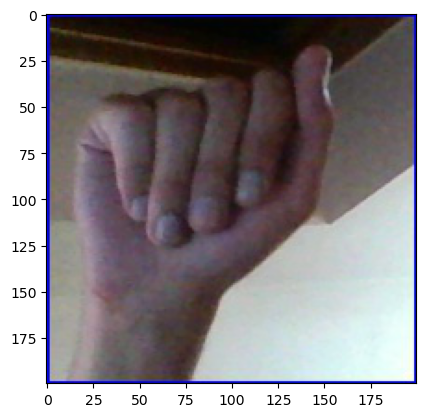

In [4]:
# checking images work correctly or not
plt.imshow(X[1])

In [5]:
y = np.zeros((n, k))
correct_val = 0
for ind in range(0, n, n//k):
    y[ind: ind+n//k, correct_val] = 1
    # print(ind, ind+n//k, correct_val)
    correct_val +=1 
y # softmax matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Traning sequential NN model (*need to run it still*)

In [6]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

# creating a sequential model with convolution and pooling layer
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(k, activation='sigmoid'))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001FF3BE4D590>>

In [7]:
# compiling the model with binary cross entropy loss function and measuring using accuracy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# train the model for 10 epoch with batch size of 64
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/100


41/41 [==============================] - 27s 611ms/step - loss: 0.3965 - accuracy: 0.0287 - val_loss: 0.2719 - val_accuracy: 0.0517
Epoch 2/100
41/41 [==============================] - 23s 572ms/step - loss: 0.2162 - accuracy: 0.0368 - val_loss: 0.1909 - val_accuracy: 0.0517
Epoch 3/100
41/41 [==============================] - 24s 579ms/step - loss: 0.1904 - accuracy: 0.0310 - val_loss: 0.1758 - val_accuracy: 0.0207
Epoch 4/100
41/41 [==============================] - 23s 556ms/step - loss: 0.1826 - accuracy: 0.0352 - val_loss: 0.1684 - val_accuracy: 0.0276
Epoch 5/100
41/41 [==============================] - 22s 539ms/step - loss: 0.1776 - accuracy: 0.0303 - val_loss: 0.1621 - val_accuracy: 0.0207
Epoch 6/100
41/41 [==============================] - 22s 531ms/step - loss: 0.1734 - accuracy: 0.0360 - val_loss: 0.1561 - val_accuracy: 0.0207
Epoch 7/100
41/41 [==============================] - 21s 523ms/step - loss: 0.1710 - accuracy: 0.0402 - val_loss: 0.1534 - val_accurac

1/1 [==============================] - 0s 187ms/step
[ 0 22 20]
A (0.368)
T (0.319)
S (0.0464)


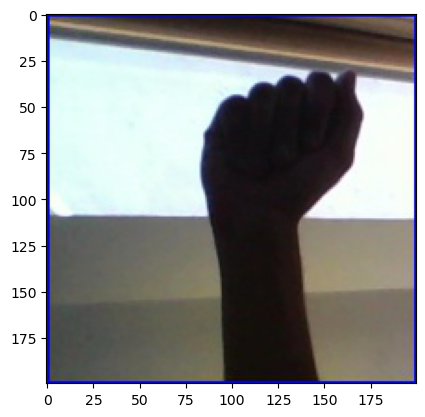

In [18]:
# test the data manually
img = image.load_img("asl_alphabet_test/A_test.jpg", target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255 # normalise the data

# show the image and the top 3 classes
# classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(alphabets[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]])) # with their property
plt.imshow(img)

In [37]:
img = image.load_img("asl_alphabet_test/A_test.jpg", target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255 # normalise the data

# show the image and the top 3 classes
# classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_3 = np.argsort(proba[0])[:-4:-1]

1/1 [==============================] - 0s 22ms/step


In [40]:
np.argsort(proba[0])[-1]

0

# Testing the model

### Seeing how confident is with the first prediction which should be "A"

In [83]:
img = image.load_img(root_test + "\\A_test.jpg", target_size=(200,200,3)) # load each image as (200,200,3) cube
img = image.img_to_array(img)
img = img/255 # normalise the data
# predict based on the image and calculate accuracy
proba = model.predict(img.reshape(1,200,200,3))
print(f"relative confidence in class A is: {proba[0][0]/np.sum(proba[0])}")

1/1 [==============================] - 0s 23ms/step
relative confidence in class A is: 0.4846581220626831


### Now checking accuracy on the relatively small test data

In [64]:
root_test = "asl_alphabet_test" # main training folder

image_test_df= []
y_bar = []
for x_i in os.listdir(root_test):
    if '.jpg' not in x_i: continue # only select the image files
    # print(root_test+"\\"+x_i)
    img = image.load_img(root_test + "\\" + x_i, target_size=(200,200,3)) # load each image as (200,200,3) cube
    img = image.img_to_array(img)
    img = img/255 # normalise the data
    # predict based on the image and calculate accuracy
    proba = model.predict(img.reshape(1,200,200,3))
    y_bar.append(np.argsort(proba[0])[-1])   

1/1 [==============================] - 0s 21ms/step


In [66]:
y_test = [i for i in range(0,29)]
print(f"accuracy of the model is {np.sum(y_bar != y_test)}")

accuracy of the model is 1


The accuracy of the model is a bit misleading as we do not have enough testing data to check it properly, so the validation accuracy of the last few epochs would be a better estimate for test accuracy 
$$\text{test}_\text{acc} \approx \text{accuracy}_\text{val} \approx 83$$

Where the details of the parameter in the models can be seen below

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 47, 47, 32)        0

# Storing the model

In [70]:
joblib.dump(model, 'cnn_model.pkl')

['cnn_model.pkl']

In [71]:
cnn_model = joblib.load('cnn_model.pkl')

In [72]:
cnn_model.summary() # checking if the correct model is stored correctly

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 47, 47, 32)        0